In [2]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import jieba
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.frame import DataFrame
from collections import Counter

import os
# os.chdir('E:\\杨华/和田红宇校内项目/论文前沿分析用')

In [5]:
#读入数据
data = pd.read_excel('CNKI-HB.xlsx')
data.head()
#查看数据信息
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'CNKI-HB.xlsx'

In [6]:
data_Summary=data['Summary-摘要']
data_Summary

NameError: name 'data' is not defined

In [ ]:
#去掉财经及大数据相关专业后词云图
zytj2=zytj.iloc[12:80]
zytj2

zywc=WordCloud(font_path='simhei.ttf',background_color='white',width=1500,height=1000).generate_from_frequencies(zytj2)
plt.imshow(zywc)
plt.axis('off')
plt.show()

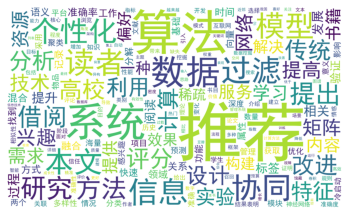

In [6]:
#读入数据

text=open('pre_corpora.txt','r',encoding='UTF-8').read()
stopword=open('stopwords.txt','r',encoding='gbk').read()#加入停用词文件
stopword_xj=['图书','图书馆','用户']#本问题题干中没用的词

con_word=[x for x in jieba.cut(text,cut_all=False) if len(x)>=2 and (x not in stopword) and (x not in stopword_xj)]#分词并取长度大于等于2的
word_tf= Counter(con_word)#统计词频(x not in stopword) and (x not in stopword_xj)
#word_tfl=list(word_tf)
wc=WordCloud(font_path='simhei.ttf',background_color='white',width=1000,height=600).generate_from_frequencies(word_tf)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
#1)LDA模型训练准备:预处理数据。
# -*- coding:utf-8 _*_ 
import os
import re
import jieba

# 创建停用词列表
def st_words_list(): 
    sw=[line.strip() for line in open('stopwords.txt',encoding='gbk').readlines()]
    return sw

# 对中文句子分词
def segment_depart(sentence):
    se_depart = jieba.cut(sentence.strip()) 
    stopword_xj=['图书','图书馆','用户','推荐']#本问题题干中没用的词
    se_depart =[x for x in se_depart if len(x)>=2 and (x not in stopword_xj)]
    stop_wd = st_words_list() 
    results = ''
    for word in se_depart:
         if word not in stop_wd:
            results += word 
            results += " "
    return results

# 对文档分词
#if not os.path.exists('pre_corpora.txt'):
  
filename = "pre_corpora.txt" 
out_fname = "train_corpora.txt"
inputs = open(filename, 'r', encoding='UTF-8')
outputs = open(out_fname, 'w', encoding='UTF-8')


# 数据清理
for line in inputs:
    line=line.split('\t')[0]
#    line =re.sub(r'[^\u4e00-\u9fa5]+','',line)
    if not line=='':
        lseg=segment_depart(line.strip())
        outputs.write(lseg.strip() + '\n')

outputs.close()
inputs.close()
print("数据清理完成!")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 1.095 seconds.
Prefix dict has been built successfully.


数据清理完成!


In [13]:
from gensim import corpora, models, similarities 
#from gensim import corpora

#2)文档转为词向量和训练LDA模型学习过程，具体代码如下。
# 打开语料库
file_read = open('train_corpora.txt', 'r',encoding='utf-8')
tr= []
for line in file_read.readlines():
    le= [word.strip() for word in line.split(' ')]
    tr.append(le)

#分词结果构建词典
dict = corpora.Dictionary(tr)
#生成语料
corpus =[dictionary.doc2bow(text) for text in tr]
# TF-IDF转换
corpus_tfidf = tfidf1[corpus]
# index= similarities.SparseMatrixSimilarity(tfidf1[corpus], num_features=len(dic))
#训练LDA模型
lda=models.LdaModel(corpus=corpus,id2word=dict,num_topics=5)
# 获取主题列表
tp_list = lda.print_topics(5)
# 输出每个主题
for topic in tp_list:
    print(topic)

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [14]:
#基于Word2Vec 词向量空间模型构建   环境搭建()

import gensim #gensim导入
from gensim.models import Word2Vec #Word2Vec导入
from gensim.models.Word2Vec import LineSentence 

#训练word to vector →word embedding
import importlib,sys
importlib.reload(sys)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

def deal_data(path_in,path_out):
#输入实验数据集并训练
    input_dir='E:/管制专利/Patentdata'
    outp1='E:/管制专利/Patentdata.bin'
    outp2='E:/管制专利/Patentdata01/Patentdata07'
    fileNames=os.listdir（input_dir）
    model = Word2Vec([LineSentence], window=7, min_count=3, vector_size=256)
    workers=multiprocessing.cpu_count(),iter=30
#模型生成
    model.save（outp1）
    model.wv.save_Word2Vec_format（outp2,binary=False）

SyntaxError: invalid character in identifier (447907056.py, line 17)

In [15]:
#科技前沿主题抽取  环境搭建（）

#gensim导入Word2Vec与KeyedVectors；sklearn导入LDA
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import LatentDirichletAllocation

#设置n=15主题词组→每组n=10主题词抽取
n_topics = 15
lda = LatentDirichletAllocation(n_topics=n_topics,max_iter=50,learning_method='online',learning_offset=50,random_state=0)
lda.fit(tf)
print_top_words(lda, tf_feature_names, n_top_words)
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
print()
n_top_words =10
#备选主题词表生成
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject